In [ ]:
from tensorflow import keras
from keras.utils.image_utils import load_img
from keras.utils.image_utils import img_to_array
from keras.applications.vgg16 import preprocess_input

In [ ]:
from torchvision.datasets import INaturalist

In [ ]:
#https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34

In [ ]:
# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
img_path = "/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog"

In [ ]:
import os
image_files =[]
def traverseDir(folderPath):

    for subFolderRoot, foldersWithinSubFolder, files in os.walk(folderPath, topdown=False):

        for fileName in files:
            print(os.path.join(subFolderRoot, fileName))
            image_files.append (os.path.join(subFolderRoot, fileName))

        for folderNameWithinSubFolder in foldersWithinSubFolder:
            print(os.path.join(subFolderRoot, folderNameWithinSubFolder))


traverseDir(img_path)

/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog/5a2176e7-23d2-11e8-a6a3-ec086b02610b.jpg
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog/5a24aa61-23d2-11e8-a6a3-ec086b02610b.jpg
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog/59fae654-23d2-11e8-a6a3-ec086b02610b.jpg
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog/5987b2ec-23d2-11e8-a6a3-ec086b02610b.jpg
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog/59849650-23d2-11e8-a6a3-ec086b02610b.jpg
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog/59d41a2d-23d2-11e8-a6a3-ec086b02610b.jpg
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog/597b49bb-23d2-11e8-a6a3-ec086b02610b.jpg
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog/59c99e0c-23d2-11e8-a6a3-ec086b02610b.jpg
/gdrive/My Drive/Colab Notebooks

In [ ]:
flowers = [[f.strip(f.split('/')[-1]),f.split('/')[-1]] for f in  image_files if ".jpg" in f]

In [ ]:
len (flowers)

359

In [ ]:
import random
flowers      = random.sample(flowers, 200)

In [ ]:
flowers [-1]

['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog/',
 '5a296357-23d2-11e8-a6a3-ec086b02610b.jpg']

In [ ]:
dir_blur = os.listdir("/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs/")
dir_blur = list (set ([i for i in dir_blur if "blur" in i]))

In [ ]:
dir_blur

['blur_dog_238.jpg',
 'blur_dog_205.jpg',
 'blur_cat_64.jpg',
 'blur_cat_538.jpg',
 'blur_cat_217.jpg',
 'blur_dog_256.jpg',
 'blur_dog_85.jpg',
 'blur_cat_311.jpg',
 'blur_dog_327.jpg',
 'blur_cat_39.jpg',
 'blur_dog_401.jpg',
 'blur_dog_448.jpg',
 'blur_dog_76.jpg',
 'blur_cat_363.jpg',
 'blur_cat_577.jpg',
 'blur_dog_168.jpg',
 'blur_dog_532.jpg',
 'blur_cat_492.jpg',
 'blur_dog_244.jpg',
 'blur_dog_236.jpg',
 'blur_dog_405.jpg',
 'blur_cat_465.jpg',
 'blur_dog_485.jpg',
 'blur_cat_423.jpg',
 'blur_dog_458.jpg',
 'blur_cat_332.jpg',
 'blur_dog_133.jpg',
 'blur_cat_60.jpg',
 'blur_cat_274.jpg',
 'blur_cat_152.jpg',
 'blur_dog_576.jpg',
 'blur_dog_182.jpg',
 'blur_cat_184.jpg',
 'blur_cat_528.jpg',
 'blur_cat_88.jpg',
 'blur_cat_375.jpg',
 'blur_dog_533.jpg',
 'blur_cat_292.jpg',
 'blur_cat_161.jpg',
 'blur_dog_412.jpg',
 'blur_cat_172.jpg',
 'blur_cat_474.jpg',
 'blur_cat_10.jpg',
 'blur_cat_585.jpg',
 'blur_cat_269.jpg',
 'blur_dog_259.jpg',
 'blur_dog_290.jpg',
 'blur_cat_574.jpg',

In [ ]:
len (dir_blur)

100

In [ ]:
for i in range (1):
  with os.scandir("/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs/") as files:

    # loops through each file in the directory
      for file in files:
            if file.name.startswith('blur'):
            # adds only the image files to the flowers list
              f_path = "/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs"
              flowers.append([f_path,file.name])

In [ ]:
flowers [0]

['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/dogs_images/Images/n02097658-silky_terrier/',
 'n02097658_7893.jpg']

In [ ]:
flowers [-1]

['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs',
 'blur_dog_238.jpg']

In [ ]:
flowers [-17:-1]

[['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs',
  'blur_cat_292.jpg'],
 ['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs',
  'blur_cat_528.jpg'],
 ['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs',
  'blur_dog_306.jpg'],
 ['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs',
  'blur_cat_577.jpg'],
 ['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs',
  'blur_cat_399.jpg'],
 ['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs',
  'blur_dog_182.jpg'],
 ['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs',
  'blur_dog_236.jpg'],
 ['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs',
  'blur_cat_217.jpg'],
 ['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_dogs',
  'blur_cat_202.jpg'],
 ['/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/blurry_

In [ ]:
len (flowers)

200

In [ ]:
img = load_img(flowers [-1] [0] +"/"+ flowers [-1] [1], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


In [ ]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [ ]:
x = preprocess_input(reshaped_img)

In [ ]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467096/553467096 [==============================] - 18s 0us/step


In [ ]:
features = model.predict(reshaped_img)
print(features.shape)

1/1 [==============================] - 1s 653ms/step
(1, 4096)


In [ ]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
extract_features(flowers [0] [0] +"/"+ flowers [0] [1],model)

1/1 [==============================] - 0s 351ms/step


array([[0.        , 2.2682652 , 0.51811844, ..., 1.6591887 , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
extract_features(flowers [-1] [0] +"/"+ flowers [-1] [1],model)

1/1 [==============================] - 0s 237ms/step


array([[0.       , 2.8411157, 0.       , ..., 0.       , 0.482932 ,
        0.       ]], dtype=float32)

In [ ]:
flowers_r_df = pd.DataFrame (flowers)
flowers_r_df ["file"] = flowers_r_df [0] + "/" + flowers_r_df[1]
flowers_r_df = flowers_r_df.drop ([0,1],axis = 1)
flowers_r_df ["model"] = model
flowers_r_df

,file,model
0,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
1,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
2,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
3,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
4,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
...,...,...
195,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
196,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
197,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
198,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...


In [ ]:
counter = 0

In [ ]:
def extract_features_df (df):

    global counter
    counter = counter + 1
    #print (df)
    print (counter)
    #print (df ["file"])

    # load the image as a 224x224 array
    img = load_img(df ["file"].values [0], target_size=(224,224))

    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)

    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)

    # prepare image for model
    imgx = preprocess_input(reshaped_img)

    # get the feature vector

    features = model.predict(imgx, use_multiprocessing=True)

    df ["features"] = [features]

    #df.to_csv ("/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/hardtoclassify/hardtoclassify_dogs.csv",mode='a',index=False,header=False)
    return df

In [ ]:
apply_df = flowers_r_df.groupby ("file").apply (extract_features_df)

1
1/1 [==============================] - 0s 246ms/step
2
1/1 [==============================] - 0s 240ms/step
3
1/1 [==============================] - 0s 249ms/step
4
1/1 [==============================] - 0s 238ms/step
5
1/1 [==============================] - 0s 244ms/step
6
1/1 [==============================] - 0s 247ms/step
7
1/1 [==============================] - 0s 244ms/step
8
1/1 [==============================] - 0s 242ms/step
9
1/1 [==============================] - 0s 247ms/step
10
1/1 [==============================] - 0s 246ms/step
11
1/1 [==============================] - 0s 240ms/step
12
1/1 [==============================] - 0s 241ms/step
13
1/1 [==============================] - 0s 239ms/step
14
1/1 [==============================] - 0s 269ms/step
15
1/1 [==============================] - 0s 280ms/step
16
1/1 [==============================] - 0s 283ms/step
17
1/1 [==============================] - 0s 232ms/step
18
1/1 [==============================] - 0s 237ms/step
1

In [ ]:
apply_df.columns

Index(['file', 'model', 'features'], dtype='object')

In [ ]:
filenames = apply_df ["file"]

In [ ]:
# get a list of just the features
#feat = np.array(list(data.values()))
feat = np.array(list(apply_df ["features"].values))
feat.shape

(200, 1, 4096)

In [ ]:
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

(200, 4096)

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
kmeans = KMeans(n_clusters= 2, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=2, random_state=22)

In [ ]:
len (kmeans.cluster_centers_)

2

In [ ]:
kmeans.cluster_centers_[-1]

array([ 1.85872517e+01,  1.45358849e+00, -6.42214179e-01, -2.66190886e-01,
        7.57313371e-01,  2.62949944e-01,  8.13475251e-02, -2.12139219e-01,
        1.36458814e-01, -6.30644336e-02,  2.70306645e-03, -1.86782897e-01,
       -1.77153617e-01, -4.92678909e-03,  7.72454171e-03,  3.39120738e-02,
        4.39691842e-02,  1.04299888e-01, -1.20842092e-01, -4.90347594e-02,
        6.18269444e-02, -7.86386505e-02,  4.54263352e-02,  5.67477080e-04,
       -1.39310909e-02,  1.04293087e-02,  5.60935810e-02,  3.33164297e-02,
        1.52205043e-02,  7.13643134e-02, -5.79322083e-03, -2.44067665e-02,
       -4.63311598e-02,  2.20505577e-02,  2.99948757e-03, -3.96627095e-03,
        5.09087481e-02,  1.59313381e-02,  4.12454829e-02,  2.30890401e-02,
       -9.06714424e-03,  1.25364484e-02,  1.69544313e-02,  1.28531065e-02,
       -6.19940972e-03, -5.28516322e-02,  3.20839882e-02, -3.51721384e-02,
        9.04060155e-03, -1.83096435e-02,  9.05555766e-03,  1.24302285e-04,
       -6.79929787e-03, -

In [ ]:
kmeans.predict(x)

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1], dtype=int32)

In [ ]:
kmeans.transform(x)

array([[13.748285 , 45.533062 ],
       [57.450775 , 38.85626  ],
       [50.39648  , 27.9228   ],
       [14.207101 , 43.936592 ],
       [14.493665 , 41.774307 ],
       [21.946543 , 46.531864 ],
       [64.34847  , 43.964355 ],
       [60.964676 , 37.11373  ],
       [51.794586 , 25.959217 ],
       [51.55644  , 37.15319  ],
       [58.493057 , 45.413445 ],
       [49.001225 , 36.796574 ],
       [29.186642 , 51.499996 ],
       [33.725834 , 40.622746 ],
       [57.749813 , 35.30766  ],
       [17.524372 , 46.415844 ],
       [62.57139  , 38.22156  ],
       [15.167146 , 45.41904  ],
       [46.580357 , 34.333275 ],
       [56.69735  , 34.02474  ],
       [61.389053 , 38.75544  ],
       [45.740154 , 37.686264 ],
       [13.83775  , 43.70265  ],
       [53.40685  , 31.299131 ],
       [16.825209 , 43.798252 ],
       [21.984016 , 46.355247 ],
       [59.479507 , 39.671974 ],
       [50.72551  , 40.583572 ],
       [53.993916 , 35.357735 ],
       [63.58939  , 44.14824  ],
       [47

In [ ]:
len (kmeans.transform(x))

200

In [ ]:
len (kmeans.transform(x) [-1])

2

In [ ]:
kmeans.transform(x) [-1]

array([57.723747, 35.005123], dtype=float32)

In [ ]:
len (kmeans.labels_)

200

In [ ]:
kmeans.labels_ [-17:]

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():

        groups[cluster] = []
        groups[cluster].append([file,kmeans.transform(x) [list(filenames).index(file)]])
    else:
        groups[cluster].append([file,kmeans.transform(x) [list(filenames).index(file)]])

In [ ]:
for k in groups:
  print (k,len (groups [k]))

1 116
0 84


In [ ]:
# view the filenames in cluster 0
groups[0]

[['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//5a0affb3-23d2-11e8-a6a3-ec086b02610b.jpg',
  array([37.04112 , 41.884785], dtype=float32)],
 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//597cd425-23d2-11e8-a6a3-ec086b02610b.jpg',
  array([37.703316, 49.712402], dtype=float32)],
 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59af95de-23d2-11e8-a6a3-ec086b02610b.jpg',
  array([26.139263, 43.694294], dtype=float32)],
 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59b7a5f9-23d2-11e8-a6a3-ec086b02610b.jpg',
  array([27.629513, 37.60776 ], dtype=float32)],
 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59e105ae-23d2-11e8-a6a3-ec086b02610b.jpg',
  array([44.76465, 55.53784], dtype=float32)],
 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59e10582-23d2-11e8-a6a3-ec086b02610b.j

In [ ]:
# view the filenames in cluster 0
len (groups[0])

91

In [ ]:
kmeans.labels_

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1], dtype=int32)

In [ ]:
kmeans.labels_ [-100:-10]

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int32)

In [ ]:
groups [1] [-1]

['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/cat//5a1fe76f-23d2-11e8-a6a3-ec086b02610b.jpg',
 array([57.723747, 35.005123], dtype=float32)]

In [ ]:
import pandas as pd

In [ ]:
for cluster in groups :
    print (cluster , "blur" ,len ([g for g in groups [cluster] if "blur" in g [0]] ) )
    print (cluster , "good" ,len ([g for g in groups [cluster] if "blur" not in g [0]] ) )


1 blur 70
1 good 246
2 blur 0
2 good 104
3 blur 24
3 good 101
0 blur 0
0 good 49


In [ ]:
from tensorflow.python.distribute.cluster_resolver import cluster_resolver
def find_noise_cluster (groups):
    good_examples = []
    bad_examples  = []
    bad_examples_dict = {}
    for cluster in groups :
      bad_examples.append ([cluster , len ([g for g in groups [cluster] if "blur" in g [0]] ) ])
      bad_examples_dict [cluster]  =  len ([g for g in groups [cluster] if "blur" in g [0]] )
      print (cluster , "blur" ,len ([g for g in groups [cluster] if "blur" in g [0]] ) )
      print (cluster , "good" ,len ([g for g in groups [cluster] if "blur" not in g [0]] ) )
    print ("bad_examples",bad_examples)
    print ("bad_examples_dict",bad_examples_dict)

    x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
    sorted_x = sorted(bad_examples_dict.items(), key=lambda kv: kv[1])
    print ("sorted_dict",sorted_x)
    print ("found_cluster" , sorted_x [-1] [0])
    return sorted_x [-1] [0]

In [ ]:
find_noise_cluster (groups)

1 blur 70
1 good 246
2 blur 0
2 good 104
3 blur 24
3 good 101
0 blur 0
0 good 49
bad_examples [[1, 70], [2, 0], [3, 24], [0, 0]]
bad_examples_dict {1: 70, 2: 0, 3: 24, 0: 0}
sorted_dict [(2, 0), (0, 0), (3, 24), (1, 70)]
found_cluster 1


1

In [ ]:
len ([g for g in groups [0] if "blur" in g [0]])

0

In [ ]:
len ([g for g in groups [1] if "blur" in g [0]])

70

In [ ]:
cluster_no = 1
i = 0
j = len (groups [cluster_no]) # group [1] means cluster 1
i_list = []
j_list = []
g_list = []
g_p    = []

for g in groups [cluster_no]: # group [1] means cluster 1
    i = i + 1
    j = j - 1

    if "blur" not  in g[0]: #g [0] is the name of the file
      i_list.append(i)
      j_list.append (j)
      g_list.append (g [1] [cluster_no]) # g[1] is the transformation distanace array [1] means dist to cluster 1
      g_p.append (g[0])
      print (i,j , g [1] [cluster_no],g[0])
    else:
       continue

1 115 40.239693 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59f4635c-23d2-11e8-a6a3-ec086b02610b.jpg
2 114 47.630276 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59edf15c-23d2-11e8-a6a3-ec086b02610b.jpg
3 113 41.123405 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59ddc0b1-23d2-11e8-a6a3-ec086b02610b.jpg
4 112 70.14968 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59e77eaf-23d2-11e8-a6a3-ec086b02610b.jpg
5 111 34.341366 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59d8ee54-23d2-11e8-a6a3-ec086b02610b.jpg
6 110 46.879063 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//599d7d8e-23d2-11e8-a6a3-ec086b02610b.jpg
7 109 42.92021 /gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59c31bb3-23d2-11e8-a6a3-ec086b02610b.jpg
8 108 43.392437 /gdrive/My Drive/Col

In [ ]:
pd.DataFrame (data = {"i":i_list , "j":j_list , "g":g_list,"p":g_p}).sort_values ("g").iloc [:20,:]

,i,j,g,p
22,23,93,26.634964,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
50,51,65,27.336287,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
72,73,43,28.483084,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
65,66,50,28.930340,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
25,26,90,29.151745,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
100,101,15,29.189907,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
69,70,46,29.282402,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
103,104,12,29.312109,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
47,48,68,29.363453,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
66,67,49,29.454454,/gdrive/My Drive/Colab Notebooks/ComputerVisio...


In [ ]:
pd.DataFrame (data = {"i":i_list , "j":j_list , "g":g_list,"p":g_p}).sort_values ("g").iloc [-20:,:]

,i,j,g,p
44,45,71,44.462452,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
85,86,30,44.600788,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
13,14,102,44.613331,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
67,68,48,44.753044,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
93,94,22,44.871895,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
92,93,23,44.970676,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
49,50,66,45.327953,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
45,46,70,45.813229,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
5,6,110,46.879063,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
24,25,91,47.201771,/gdrive/My Drive/Colab Notebooks/ComputerVisio...


In [ ]:
#pd.DataFrame (data = {"i":i_list , "j":j_list , "g":g_list,"p":g_p}).sort_values ("g").to_csv ('/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/moderate_blurry_animals/x.csv',mode='a',header=False)

In [ ]:
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt


In [ ]:
groups[cluster_no] [28]

['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/cat//5991035c-23d2-11e8-a6a3-ec086b02610b.jpg',
 array([37.534344, 53.70286 ], dtype=float32)]

<dtype: 'uint8'>


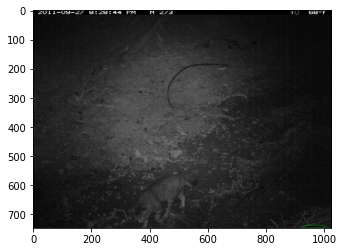

In [ ]:
filterwarnings("ignore")
#tf_img = io.read_file(groups[cluster_no][109][0])
tf_img = io.read_file(groups[cluster_no][36][0])
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)

In [ ]:
top_df = pd.DataFrame (data = {"i":i_list , "j":j_list , "g":g_list,"p":g_p}).sort_values ("g").iloc [:20,:]
top_df.head()

,i,j,g,p
22,23,93,26.634964,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
50,51,65,27.336287,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
72,73,43,28.483084,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
65,66,50,28.930340,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
25,26,90,29.151745,/gdrive/My Drive/Colab Notebooks/ComputerVisio...


In [ ]:
bottom_df = pd.DataFrame (data = {"i":i_list , "j":j_list , "g":g_list,"p":g_p}).sort_values ("g",ascending =False).iloc [:20,:]
bottom_df.head()

,i,j,g,p
3,4,112,70.149681,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
32,33,83,57.604713,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
33,34,82,56.206062,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
26,27,89,54.009350,/gdrive/My Drive/Colab Notebooks/ComputerVisio...
94,95,21,53.603016,/gdrive/My Drive/Colab Notebooks/ComputerVisio...


In [ ]:
bottom_df.index.tolist()

[38, 33, 24, 93, 47, 54, 70, 6, 57, 18, 2, 95, 56, 83, 48, 105, 20, 34, 71, 90]

67 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//5981797c-23d2-11e8-a6a3-ec086b02610b.jpg', array([23.53835 , 41.742435], dtype=float32)]
68 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59ffbc62-23d2-11e8-a6a3-ec086b02610b.jpg', array([23.669004, 40.49808 ], dtype=float32)]
50 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59a94e8c-23d2-11e8-a6a3-ec086b02610b.jpg', array([23.921532, 40.514805], dtype=float32)]
42 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59b13088-23d2-11e8-a6a3-ec086b02610b.jpg', array([24.056196, 40.542717], dtype=float32)]
72 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//5a0e3614-23d2-11e8-a6a3-ec086b02610b.jpg', array([24.221018, 41.306236], dtype=float32)]
43 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59a17c7c-23d2-11e8-a6a3-ec086b02610b.jp

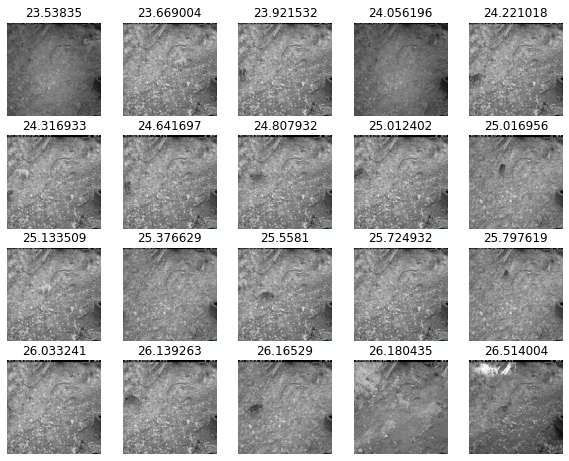

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(20):
  img = load_img(top_df.p.values.tolist()[i], target_size=(224,224))
  print (top_df.index.tolist()[i], groups[cluster_no] [top_df.index.tolist()[i]])
  # convert from 'PIL.Image.Image' to numpy array
  #img = np.array(img)
  #ax = plt.subplot(3, 3, i + 1)
  ax = plt.subplot(5, 5 ,i+1)
  plt.imshow(np.array(img).astype("uint8"))
  plt.title(groups[cluster_no] [top_df.index.tolist()[i]] [1] [cluster_no])
  plt.axis("off")

44 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//5a1e51ca-23d2-11e8-a6a3-ec086b02610b.jpg', array([52.112217, 62.30541 ], dtype=float32)]
55 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59941f10-23d2-11e8-a6a3-ec086b02610b.jpg', array([50.992935, 61.483547], dtype=float32)]
35 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59a17b50-23d2-11e8-a6a3-ec086b02610b.jpg', array([49.991436, 58.697353], dtype=float32)]
39 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59eab765-23d2-11e8-a6a3-ec086b02610b.jpg', array([49.028942, 56.898067], dtype=float32)]
17 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59a30c2c-23d2-11e8-a6a3-ec086b02610b.jpg', array([48.584873, 61.020992], dtype=float32)]
25 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59a629f5-23d2-11e8-a6a3-ec086b02610b.jp

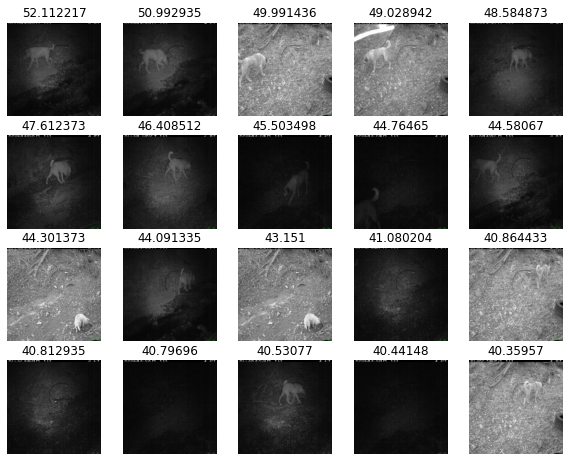

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(20):
  img = load_img(bottom_df.p.values.tolist()[i], target_size=(224,224))
  print (bottom_df.index.tolist()[i], groups[cluster_no] [bottom_df.index.tolist()[i]])
  # convert from 'PIL.Image.Image' to numpy array
  #img = np.array(img)
  #ax = plt.subplot(3, 3, i + 1)
  ax = plt.subplot(5, 5,i+1)
  plt.imshow(np.array(img).astype("uint8"))
  plt.title(groups[cluster_no] [bottom_df.index.tolist()[i]] [1] [cluster_no])
  plt.axis("off")

22 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//5968c2ab-23d2-11e8-a6a3-ec086b02610b.jpg', array([34.65663 , 26.634964], dtype=float32)]
50 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59a17a3c-23d2-11e8-a6a3-ec086b02610b.jpg', array([42.461166, 27.336287], dtype=float32)]
72 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59cf47a8-23d2-11e8-a6a3-ec086b02610b.jpg', array([42.191986, 28.483084], dtype=float32)]
65 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//5a0afffe-23d2-11e8-a6a3-ec086b02610b.jpg', array([41.816204, 28.93034 ], dtype=float32)]
25 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//5a231040-23d2-11e8-a6a3-ec086b02610b.jpg', array([37.236973, 29.151745], dtype=float32)]
100 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59e2a230-23d2-11e8-a6a3-ec086b02610b.j

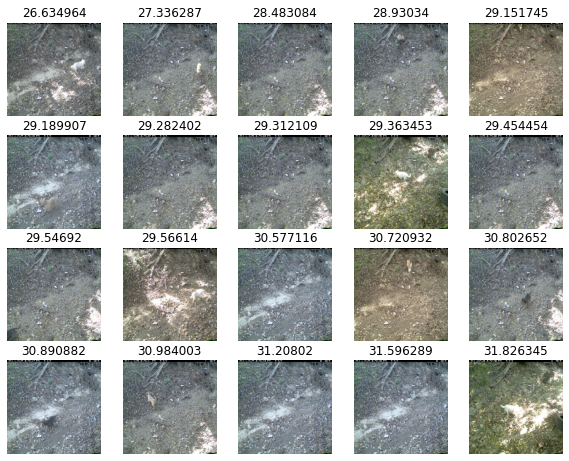

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(20):
  img = load_img(top_df.p.values.tolist()[i], target_size=(224,224))
  print (top_df.index.tolist()[i], groups[cluster_no] [top_df.index.tolist()[i]])
  # convert from 'PIL.Image.Image' to numpy array
  #img = np.array(img)
  #ax = plt.subplot(3, 3, i + 1)
  ax = plt.subplot(5, 5 ,i+1)
  plt.imshow(np.array(img).astype("uint8"))
  plt.title(groups[cluster_no] [top_df.index.tolist()[i]] [1] [cluster_no])
  plt.axis("off")

3 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59e77eaf-23d2-11e8-a6a3-ec086b02610b.jpg', array([71.99109, 70.14968], dtype=float32)]
32 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59eaba27-23d2-11e8-a6a3-ec086b02610b.jpg', array([66.82082 , 57.604713], dtype=float32)]
33 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59ccd133-23d2-11e8-a6a3-ec086b02610b.jpg', array([58.336487, 56.206062], dtype=float32)]
26 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//5a0631c5-23d2-11e8-a6a3-ec086b02610b.jpg', array([62.818047, 54.00935 ], dtype=float32)]
94 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//59b7a948-23d2-11e8-a6a3-ec086b02610b.jpg', array([59.769794, 53.603016], dtype=float32)]
107 ['/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/location_38/dog//597386b5-23d2-11e8-a6a3-ec086b02610b.jpg'

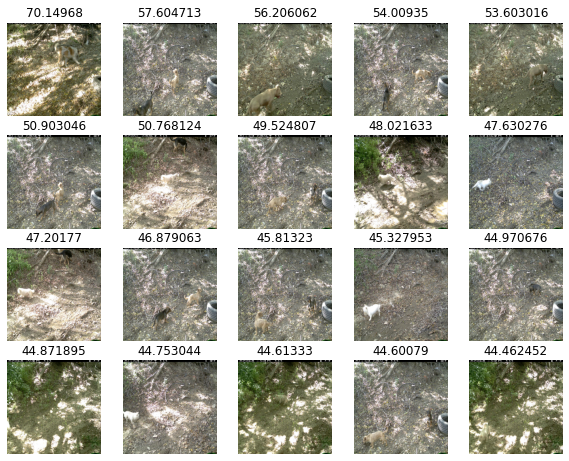

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(20):
  img = load_img(bottom_df.p.values.tolist()[i], target_size=(224,224))
  print (bottom_df.index.tolist()[i], groups[cluster_no] [bottom_df.index.tolist()[i]])
  # convert from 'PIL.Image.Image' to numpy array
  #img = np.array(img)
  #ax = plt.subplot(3, 3, i + 1)
  ax = plt.subplot(5, 5,i+1)
  plt.imshow(np.array(img).astype("uint8"))
  plt.title(groups[cluster_no] [bottom_df.index.tolist()[i]] [1] [cluster_no])
  plt.axis("off")